In [1]:
import pytesseract
import shutil
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
try:
 from PIL import Image
except ImportError:
  import Image
import cv2

import csv


In [2]:
# Example usage
video_path = '../1215B.mov'
output_folder = '../frames_output'
#if os.path.exists(output_folder):
#  import shutil
#  shutil.rmtree(output_folder)
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
FPS=cap.get(cv2.CAP_PROP_FPS)
second_start1=33
second_start=second_start1+9.6
adj=0
start_frame=(second_start-adj)*FPS
output_res=6
mod=output_res*30



os.makedirs(output_folder,exist_ok =True)
output_csv = '../text_data.csv'
start_frame

1278.0

In [3]:
# Function to manually select ROI using a mouse
def select_roi(image, window_name='Select ROI'):
    roi = cv2.selectROI(window_name, image)
    cv2.destroyAllWindows()
    return roi


# Function to extract frames from video
def extract_frames(video_path, output_folder,start_frame):
    cap = cv2.VideoCapture(video_path)
    count = 0
    success = True
    go=count-start_frame % mod == 0
    while success:
        success, image = cap.read()
        if count-start_frame<0:
            count+=1 
        elif count-start_frame>=0:
            if success and (count-start_frame) % mod ==0:  # Read every 60th frame 30 fpd
                #print(count)
                cv2.imwrite(f"{output_folder}/frame_{count}.png", image)
            count+= 1

    cap.release()


# Function to crop and extract text from an image using a given ROI
def process_frame(image_path, r):
    image = cv2.imread(image_path)
    
    # Crop image based on exemplar ROI
   
    cropped_image = image[int(r[1]):int(r[1]+r[3]),  
                      int(r[0]):int(r[0]+r[2])] 
  
    # Convert cropped image to grayscale
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    
    img_bin = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 199, 5)
    
    kernel = np.ones((2, 2), np.uint8)
    img_eroded = cv2.erode(img_bin, kernel, iterations=2)

    # Use pytesseract to extract text
    text = pytesseract.image_to_string(img_eroded,lang='eng',
                                       config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789').strip()

    # Append extracted text to array
    text_array.append(text)

    


In [4]:
# Extract frames from the video (read every 10th frame)
print("here")
extract_frames(video_path, output_folder,start_frame)


here


In [5]:
from natsort import natsorted
files=natsorted([output_folder+'/%s'%(f) for f  in os.listdir(output_folder)])
# Choose an exemplar frame for ROI selection
exemplar_frame_path =files[0]
exemplar_frame = cv2.imread(exemplar_frame_path)
exemplar_roi = select_roi(exemplar_frame)

# Process every 10th frame with the exemplar ROI
text_array = []


for frame in files:
    process_frame(frame, exemplar_roi)

#shutil.rmtree(output_folder)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread (0x6d07b60).
Cannot move to target thread (0x457c040)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread (0x6d07b60).
Cannot move to target thread (0x457c040)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread (0x6d07b60).
Cannot move to target thread (0x457c040)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread (0x6d07b60).
Cannot move to target thread (0x457c040)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread (0x6d07b60).
Cannot move to target thread (0x457c040)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread (0x6d07b60).
Cannot move to target thread (0x457c040)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread (0x6d07b60).
Cannot move to target thread (0x457c040)

QObject::moveToThread: Current thread (0x457c040) is not the object's thread

In [6]:
output_folder

'../frames_output'

/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

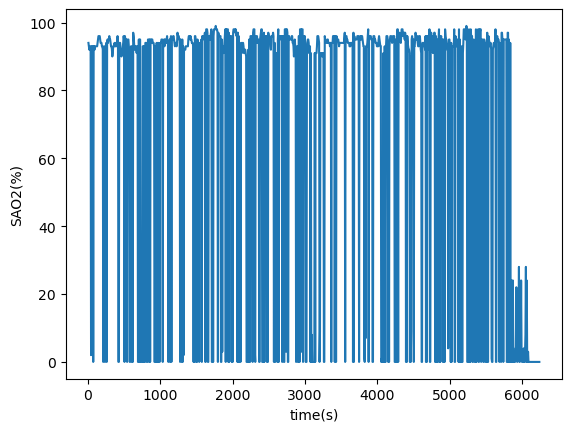

,time(s),SAO2(%)


/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

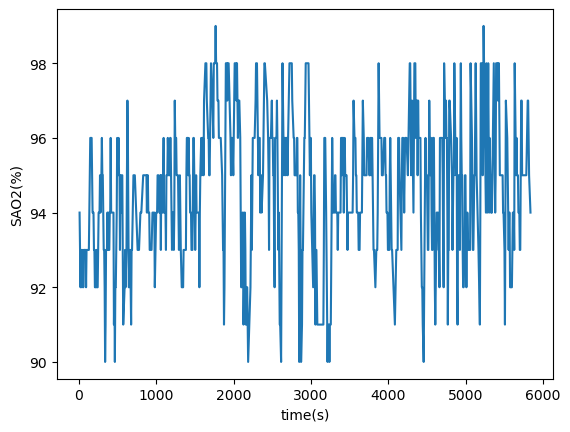

/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jeffrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

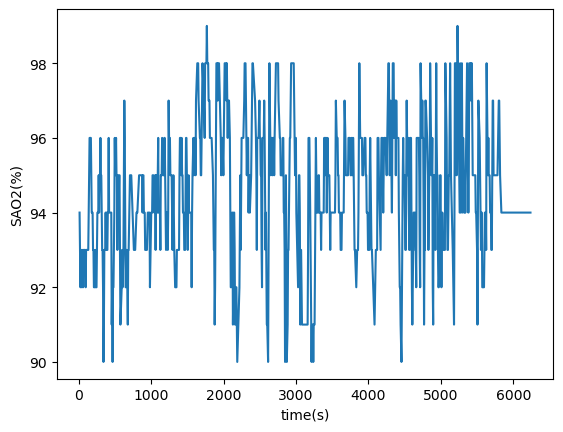

In [46]:
import re
import seaborn as sns 

natsorted(files)
frame_n=[int(re.search('frame_(.*).png',f).group(1)) for f in files]
seconds=[(x/30)-second_start1 for x in frame_n]

df=pd.DataFrame(columns=['time(s)','SAO2(%)'])
df['time(s)']=seconds
##  Raw values Read
df['SAO2(%)']=text_array
df['SAO2(%)']=pd.to_numeric(df['SAO2(%)'], errors='coerce')
df['SAO2(%)'] = df['SAO2(%)'].fillna(0).astype(int)
sns.lineplot(x = "time(s)", y = "SAO2(%)", 
             data = df) 
plt.show()

##  values<30 as NAN
df.loc[df['SAO2(%)']<30,'SAO2(%)']=np.NaN
display(df[df['SAO2(%)']==np.NaN])
sns.lineplot(x = "time(s)", y = "SAO2(%)", 
             data = df) 
plt.show()

##  Interpolate

df['SAO2(%)']=df['SAO2(%)'].interpolate()
sns.lineplot(x = "time(s)", y = "SAO2(%)", 
             data = df)
plt.show()

In [49]:
df.to_csv('SAO2_timeatscanstart.csv',na_rep='NaN')

In [50]:
df

,time(s),SAO2(%)
0,9.6,94.0
1,15.6,93.0
2,21.6,92.0
3,27.6,93.0
4,33.6,93.0
...,...,...
1034,6213.6,94.0
1035,6219.6,94.0
1036,6225.6,94.0
1037,6231.6,94.0
